# ARTIFICIAL NEURAL NETWORK (ANN)

###### It is also called deep neural network or deep learning.

###### What is neural network: It is basically taking logistic regression and repeating it at least 2 times.

###### In logistic regression, there are input and output layers. However, in neural network, there is at least one hidden layer between input and output layer.

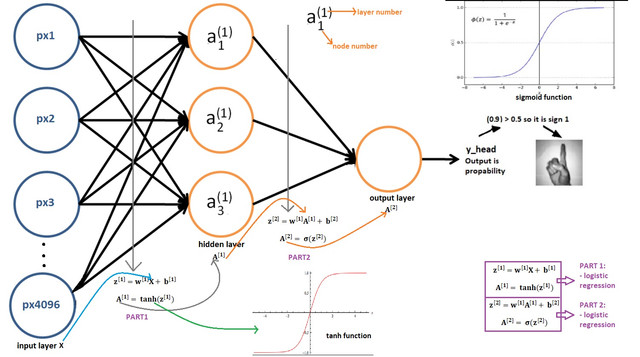

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

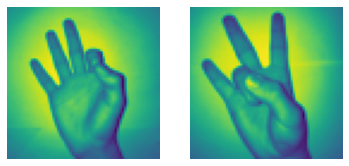

In [2]:
x_l=np.load("X.npy")
y_l=np.load("Y.npy")
img_size=64
plt.subplot(1,2,1)
plt.imshow(x_l[10].reshape(img_size,img_size))
plt.axis("off");


plt.subplot(1,2,2)
plt.imshow(x_l[500].reshape(img_size,img_size))
plt.axis("off");


In [3]:
# From 0 to 204 => ZERO sign
# From 205 to 410 is ONE sign
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,
                                               Y,
                                               test_size=0.15,
                                               random_state=42)
number_of_train=X_train.shape[0]
number_of_test=X_test.shape[0]

print("Number of Train: ", number_of_train)
print("Number of Test: ",number_of_test)

Number of Train:  348
Number of Test:  62


* Now we have 3 dimensional input array (X) so we need to make it flatten (2D) in order to use as input for our first deep learning model.
* Our label array (Y) is already flatten(2D) so we leave it like that.
* Lets flatten X array(images array).

In [5]:
X_train_flatten=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_flatten=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_train.shape[2])

print("X train flatten: ", X_train_flatten.shape)
print("X test flatten: ",X_test_flatten.shape)

X train flatten:  (348, 4096)
X test flatten:  (62, 4096)


In [6]:
x_train=X_train_flatten.T
x_test=X_test_flatten.T
y_train=Y_train.T
y_test=Y_test.T

## INITIALIZING PARAMETERS and SIZE OF LAYERS

##### Parameters:
* weight
* bias

In [7]:
def initialize_parameters_and_layer_size(x_train,y_train):
    parameters={"weight1": np.random.randn(3,x_train.shape[0])*0.1,
               "bias1": np.zeros((3,1)),
               "weight2":np.random.randn(y_train.shape[0],3)*0.1,
               "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

## FORWARD PROPAGATION

* Forward propagation is almost same with logistic regression.
* The only difference is we use tanh function and we make all process twice.
* Also numpy has tanh function. So we do not need to implement it.

In [8]:
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

In [9]:
def forward_propagation(x_train,parameters):
    Z1=np.dot(parameters["weight1"],x_train)+parameters["bias1"]
    A1=np.tanh(Z1)
    
    Z2=np.dot(parameters["weight2"],A1)+parameters["bias2"]
    A2=sigmoid(Z2)
    
    cache={"Z1":Z1,
          "A1":A1,
          "Z2":Z2,
          "A2":A2}
    return A2,cache

## LOSS FUNCTION & COST FUNCTION

###### The Loss Function:
* In a neural network quantifies the difference between the expected outcome and the outcome produced by the machine learning model.
* From the loss function, we can derive the gradients which are used to update the weights. 
* The average over all losses constitutes the cost.

###### The Cost Function:
* The cost function of a neural network will be the sum of errors in each layer. 
* This is done by finding the error at each layer first and then summing the individual error to get the total error.


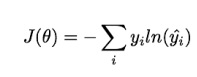

In [10]:
# COST

def cost_function(A2,Y,parameters):
    logprobs=np.multiply(np.log(A2),Y)
    cost=-np.sum(logprobs)/Y.shape[1]
    return cost

## BACKWARD PROPAGATION
* Backpropagation (backward propagation) is an important mathematical tool for improving the accuracy of predictions in data mining and machine learning.
* Backpropagation is an algorithm used to calculate derivatives quickly.
* Artificial neural networks use backpropagation as a learning algorithm to compute a gradient descent with respect to weights.

In [11]:
def backward_propagation(parameters,cache,X,Y):
    
    dZ2=cache["A2"]-Y
    dW2=np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2=np.sum(dZ2,axis=1,keepdims=True)/X.shape[1]
    
    
    dZ1=np.dot(parameters["weight2"].T,dZ2)*(1-np.power(cache["A1"],2))
    dW1=np.dot(dZ1,X.T)/X.shape[1]
    db1=np.sum(dZ1,axis=1,keepdims=True)/X.shape[1]
    
    grads={"dweight1":dW1,
          "dbias1":db1,
          "dweight2":dW2,
          "dbias2":db2}
    return grads

## UPDATE PARAMETERS

In [12]:
def update_parameters(parameters,grads,learning_rate=0.01):
    parameters={"weight1":parameters["weight1"]-learning_rate*grads["dweight1"],
               "bias1":parameters["bias1"]-learning_rate*grads["dbias1"],
               "weight2":parameters["weight2"]-learning_rate*grads["dweight2"],
               "bias2":parameters["bias2"]-learning_rate.grads["dbias2"]}
    return parameters

## PREDICTION

In [13]:
def predict(parameters,x_test):
    A2,cache=forward_propagation(x_test,parameters)
    Y_prediction=np.zeros((1,x_test.shape[1]))
# if z is bigger than 0.5, our prediction is sign one (y_head=1),
# if z is smaller than 0.5, our prediction is sign zero (y_head=0), 
    
    for i in range(A2.shape[1]):
        if A2[0,i]<=0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
    return Y_prediction

## CREATE MODEL

In [14]:
def two_layer_NN(x_train,y_train,x_test,y_test,num_iterations):
    cost_list=[]
    index_list=[]
    
    # Initialize parameters and Layer sizes:
    parameters=initialize_parameters_and_layer_size(x_train,y_train)
    
    for i in range(0,num_iterations):
        # Forward Propagation:
        A2,cache=forward_propagation(x_train,parameters)
        
        # Compute cost:
        cost=cost_function(A2,y_train,parameters)
        
        # Backward Propagation:
        grads=backward_propagation(parameters,cache,x_train,y_train)
        
        #Update Parameters:
        parameters=update_parameters(parameters,grads)
        
        if i % 100==0:
            cost_list.append(cost)
            index_list.append(i)
            print("Cost after iteration %i: %f" %(i,cost))
    
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation="vertical")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.show()
    
    # Predict
    y_prediction_test=predict(parameters,x_test)
    y_prediction_train=predict(parameters,x_train)
    
    print("train accuracy: {} %".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))
    
    return parameters
    
    parameters=two_layer_NN(x_train,y_train,x_test,y_test,num_iterations=2500)

# ANN with KERAS LIBRARY

In [15]:
x_train,x_test,y_train,y_test=x_train.T,x_test.T,y_train.T,y_test.T

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [17]:
def build_classifier():
    classifier=Sequential()
    classifier.add(Dense(units=8,kernel_initializer="uniform",activation="relu",input_dim=x_train.shape[1]))
    classifier.add(Dense(units=4,kernel_initializer="uniform",activation="relu"))
    classifier.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))
    
    classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    return classifier

classifier=KerasClassifier(build_fn=build_classifier,epochs=2)
accuracies=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=3)

mean=accuracies.mean()
variance=accuracies.std()

print("Accuracy mean: " + str(mean))
print("Accuracy variance: " + str(variance))


C:\Users\HILAL~1.YUK\AppData\Local\Temp/ipykernel_9808/613356670.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier=KerasClassifier(build_fn=build_classifier,epochs=2)


Epoch 1/2
8/8 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4741
Epoch 2/2
4/4 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4310
Epoch 1/2
8/8 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4612
Epoch 2/2
4/4 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5603
Epoch 1/2
8/8 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4483
Epoch 2/2
4/4 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5259
Accuracy mean: 0.5057471295197805
Accuracy variance: 0.054673271638697306


https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.78326&showTestData=true&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false